What You're Aiming For

In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

➡️ Dataset link

https://i.imgur.com/UNUZ4zR.jpg

➡️Columns explanation


Instructions

Install the necessary packages

Import you data and perform basic data exploration phase

Display general information about the dataset

Create a pandas profiling reports to gain insights into the dataset

Handle Missing and corrupted values

Remove duplicates, if they exist

Handle outliers, if they exist

Encode categorical features

Based on the previous data exploration train and test a machine learning classifier

Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form

Import your ML model into the streamlit application and start making predictions given the provided features values

Deploy your application on Streamlit share:

Create a github and a streamlit share accounts

Create a new git repo

Upload your local code to the newly created git repo

log in to your streamlit account an deploy your application from the git repo
 

In [60]:
import pandas as pd
import numpy as np

# ploting graphs 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly._subplots import make_subplots

# outliers
from scipy.stats import zscore

# normalisation and  transform non-num labels  to num for LabelEncoder.
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer, LabelEncoder, RobustScaler, StandardScaler

# spliting the data 
from sklearn.model_selection import train_test_split, GridSearchCV

# linear regression
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Logistic regression 
from sklearn. linear_model import LogisticRegression
# mesure the performance of classification 
from sklearn import metrics
# Classification models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# evaluating the prediction 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Unsup
# Agglomerative 
from sklearn.cluster import AgglomerativeClustering
# Dendogram
import scipy.cluster.hierarchy as shc
# K_Means 
from sklearn .cluster import KMeans
# Yellowbrick 
from yellowbrick.cluster import KElbowVisualizer

# streamlit
import streamlit as st

# pandas profiling 
from ydata_profiling import ProfileReport 

# saving the model 
import joblib

In [61]:
df = pd.read_csv('Financial_inclusion_dataset.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [63]:
df.shape

(23524, 13)

In [64]:
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [65]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [66]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [67]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [68]:
df1= df.copy()

In [69]:
df1=df1.drop(columns='uniqueid')

In [70]:
encoder = LabelEncoder()
df1 ['country'] = encoder.fit_transform(df1['country'])
df1['bank_account'] = encoder.fit_transform(df1['bank_account'])
df1['location_type'] = encoder. fit_transform(df1['location_type'])
df1['cellphone_access'] = encoder.fit_transform(df1['cellphone_access'])
df1['gender_of_respondent'] = encoder. fit_transform(df1['gender_of_respondent'])
df1['relationship_with_head'] = encoder. fit_transform(df1['relationship_with_head'])
df1['marital_status'] = encoder.fit_transform(df1['marital_status'])
df1['education_level'] = encoder.fit_transform(df1['education_level'])
df1['job_type'] = encoder.fit_transform(df1['job_type'])

<Axes: >

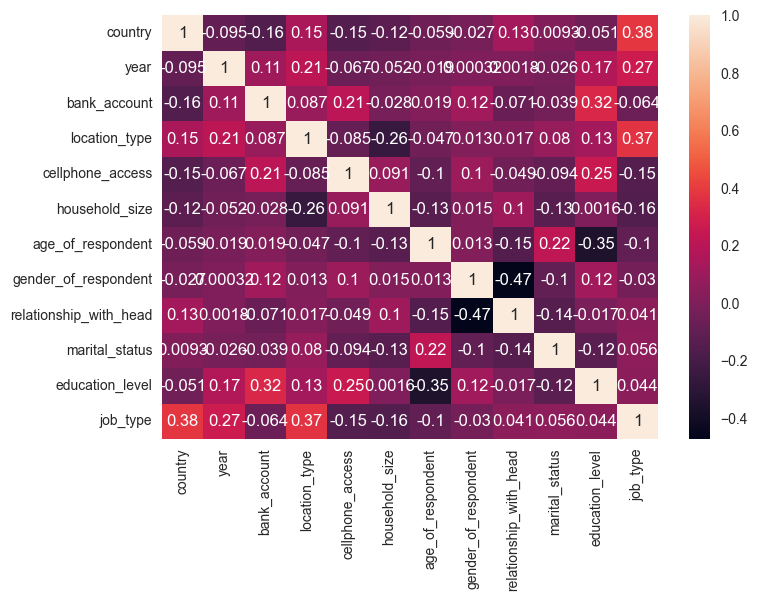

In [71]:
correlations = df1.corr()
sns.heatmap(correlations , annot= True)

In [72]:
def plots(df1):
    figure = make_subplots(2,6)
    for i , column in enumerate(df1.columns) :
        row = (i//6)+1
        col = (i%6)+1
        figure.add_trace(go.Box(y=df1[column] , name= column) , row= row , col= col)
    figure.update_layout(width = 1000, showlegend= False)
    figure.show()

plots(df1)

In [73]:
x = df1.drop(columns='bank_account')
y = df1['bank_account']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18819, 11), (4705, 11), (18819,), (4705,))

In [75]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train , y_train)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

In [76]:
LogisticRegression
LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

In [77]:
y_pred = log_reg.predict(x_test)

In [78]:
log_accuracy = accuracy_score(y_test , y_pred)
log_accuracy

0.8792773645058448

In [79]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree. fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5)

In [80]:
y_pred = decision_tree.predict(x_test)

In [81]:
decision_tree_accuracy = accuracy_score(y_test , y_pred)
decision_tree_accuracy

0.8865037194473964

In [82]:

random_forest = RandomForestClassifier(n_estimators=6)
random_forest.fit(x_train , y_train)

RandomForestClassifier(n_estimators=6)

In [83]:
y_pred = random_forest.predict(x_test)

In [84]:
random_forest_accuracy = accuracy_score(y_test , y_pred)
random_forest_accuracy

0.8656748140276301

In [85]:
knn = KNeighborsClassifier(n_neighbors=6 , n_jobs =- 1)
knn.fit(x_train , y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [86]:
y_pred =knn.predict(x_test)

In [87]:
knn_accuracy = accuracy_score(y_test , y_pred)
knn_accuracy

0.8790648246546228

In [88]:
joblib.dump(decision_tree , 'decision_tree.pkl')

['decision_tree.pkl']